In [57]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('energydata.csv');
df=pd.DataFrame(data) 

print(df.head())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [60]:
print(df.describe())

         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

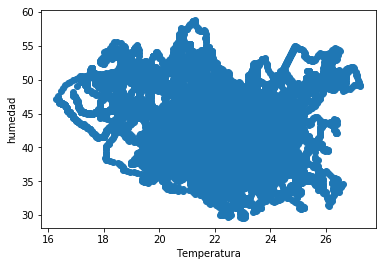

In [70]:
x1 = df['T8']
y1 = df['RH_8']

plt.scatter(x,y)
plt.xlabel("Temperatura")
plt.ylabel("humedad")
plt.show()

In [137]:
X1=np.array(list(zip(x1,y1)))
print(X1)

[[18.2        48.9       ]
 [18.2        48.86333333]
 [18.2        48.73      ]
 ...
 [24.7        49.66      ]
 [24.6625     49.51875   ]
 [24.736      49.736     ]]


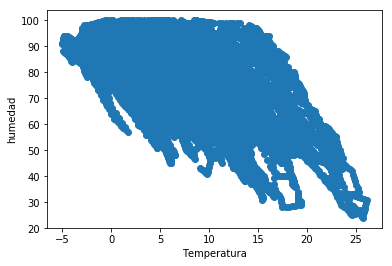

In [78]:
x = df['T_out']
y = df['RH_out']

plt.scatter(x,y)
plt.xlabel("Temperatura")
plt.ylabel("humedad")
plt.show()

In [79]:
X=np.array(list(zip(x,y)))
print(X)

[[ 6.6        92.        ]
 [ 6.48333333 92.        ]
 [ 6.36666667 92.        ]
 ...
 [22.46666667 56.33333333]
 [22.33333333 56.66666667]
 [22.2        57.        ]]


In [80]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X1)
distances, indices = nbrs.kneighbors(X1)

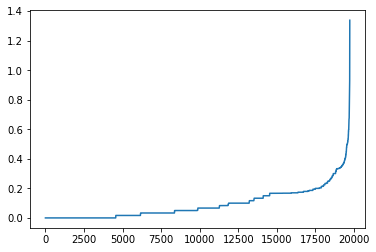

In [75]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

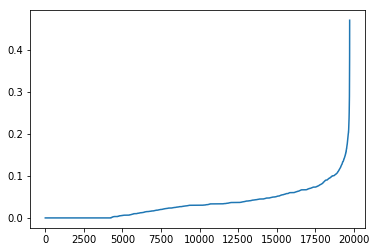

In [81]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [197]:
clustering_data = DBSCAN(eps=0.1, min_samples=30)
clustering_data.fit(X)
labels_x = clustering_data.labels_ # clusters
print(labels_x)

[-1 -1 -1 ... -1 -1 -1]


In [211]:
clustering_data1 = DBSCAN(eps=0.18, min_samples=4)
clustering_data1.fit(X1)
labels_x1 = clustering_data1.labels_ # clusters
print(labels_x1)

[ 0  0  0 ... 61 61 61]


In [198]:
core_samples = np.zeros_like(labels_x, dtype = bool)
core_samples[clustering_data.core_sample_indices_] = True
n_clusters=len(set(labels_x))-(1 if -1 in labels_x else 0)
print(n_clusters)

3


In [212]:
core_samples = np.zeros_like(labels_x1, dtype = bool)
core_samples[clustering_data.core_sample_indices_] = True
n_clusters=len(set(labels_x1))-(1 if -1 in labels_x1 else 0)
print(n_clusters)

62


In [135]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']


In [133]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

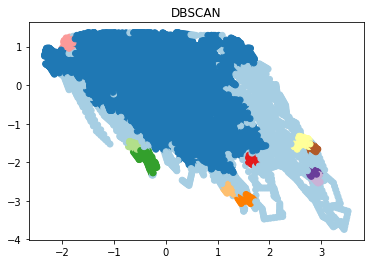

In [213]:
dbscan(X,eps=.11, min_samples=30)

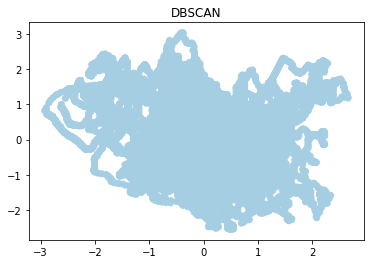

In [214]:
dbscan(X1,eps=.18, min_samples=4)